<a href="https://colab.research.google.com/github/IngErnestoAlvarez/terremoto_research/blob/main/familias_da%C3%B1adas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

# suprimimos la notacion cientifica en los outputs
pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')

In [4]:
values = pd.read_csv("train_values.csv", usecols={'building_id':'int64', 'count_families':'int64'})
values

,building_id,count_families
0,802906,1
1,28830,1
2,94947,1
3,590882,1
4,201944,1
...,...,...
260596,688636,1
260597,669485,1
260598,602512,1
260599,151409,1


In [5]:
danio = pd.read_csv("train_labels.csv")
danio

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [6]:
familias_y_danio = values.merge(danio, how='inner')
familias_y_danio.drop(columns=['building_id'], inplace=True)
familias_y_danio

,count_families,damage_grade
0,1,3
1,1,2
2,1,3
3,1,2
4,1,3
...,...,...
260596,1,2
260597,1,3
260598,1,3
260599,1,2


In [7]:
familias_por_danio = familias_y_danio.groupby('damage_grade').sum()
familias_por_danio

,count_families
damage_grade,
1,22991
2,145593
3,87834


In [8]:
familias_totales = familias_por_danio.sum()
familias_totales

count_families    256418
dtype: int64

In [9]:
familias_trasladadas = familias_por_danio.loc[1]['count_families'] + familias_por_danio.loc[2]['count_families']
familias_trasladadas

168584

In [10]:
familias_por_danio['movimiento'] = ['Sin movimiento', 'Traslado', 'Traslado']
familias_por_danio.columns = ['Familias perjudicadas','movimiento']
familias_por_danio = familias_por_danio[['movimiento', 'Familias perjudicadas']]
familias_por_danio.index = ['leve', 'moderada', 'total']
familias_por_danio.index.name = 'Destruccion del edificio'
familias_por_danio

,movimiento,Familias perjudicadas
Destruccion del edificio,,
leve,Sin movimiento,22991
moderada,Traslado,145593
total,Traslado,87834


In [11]:
f = familias_por_danio.groupby('movimiento').sum()
f

,Familias perjudicadas
movimiento,
Sin movimiento,22991
Traslado,233427


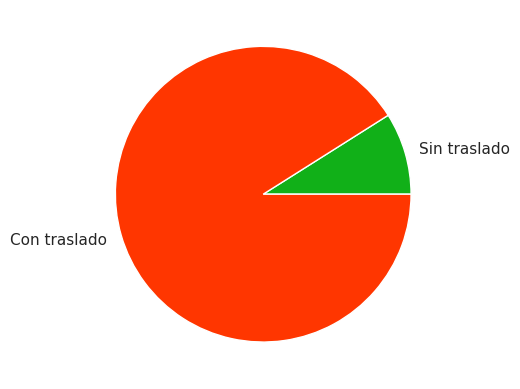

In [17]:
plt.pie(f['Familias perjudicadas'], labels=['Sin traslado', 'Con traslado'], colors=['#11b018', '#ff3600'])
plt.show()